# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [1]:
# import libraries
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sqlalchemy import create_engine

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load messages dataset
messages = pd.read_csv('disaster_messages.csv')
messages.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [3]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        26248 non-null  int64 
 1   message   26248 non-null  object
 2   original  10184 non-null  object
 3   genre     26248 non-null  object
dtypes: int64(1), object(3)
memory usage: 820.4+ KB


In [4]:
# load categories dataset
categories = pd.read_csv('disaster_categories.csv')
categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          26248 non-null  int64 
 1   categories  26248 non-null  object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [6]:
# merge datasets
df = pd.merge(messages,categories,how='inner',on='id')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


Column 'original' maynot be useful

### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [7]:
# create a dataframe of the 36 individual category columns from the categories column in the merged df
# now name this df as `categories`

categories = df['categories'].str.split(';',expand=True)

In [8]:
categories.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [9]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       26386 non-null  object
 1   1       26386 non-null  object
 2   2       26386 non-null  object
 3   3       26386 non-null  object
 4   4       26386 non-null  object
 5   5       26386 non-null  object
 6   6       26386 non-null  object
 7   7       26386 non-null  object
 8   8       26386 non-null  object
 9   9       26386 non-null  object
 10  10      26386 non-null  object
 11  11      26386 non-null  object
 12  12      26386 non-null  object
 13  13      26386 non-null  object
 14  14      26386 non-null  object
 15  15      26386 non-null  object
 16  16      26386 non-null  object
 17  17      26386 non-null  object
 18  18      26386 non-null  object
 19  19      26386 non-null  object
 20  20      26386 non-null  object
 21  21      26386 non-null  object
 22  22      26386 non-null

In [10]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# categories column names
category_colnames = list(map(lambda i:row[i][:-2], range(len(row))))

In [11]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [12]:
for column in categories.columns:
    # set each value to be the last character of the string
    categories[column] = categories[column].astype(str).str.split('-').str[1]
    
    # convert column from string to numeric
    categories[column] = pd.to_numeric(categories[column])
    
    # convert any values different than 0 and 1 to 1
    categories[column].loc[(categories[column]!=0)&(categories[column]!=1)]=1
    
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Note: the dtype of categories changes from object to int64
categories.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26386 entries, 0 to 26385
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   related                 26386 non-null  int64
 1   request                 26386 non-null  int64
 2   offer                   26386 non-null  int64
 3   aid_related             26386 non-null  int64
 4   medical_help            26386 non-null  int64
 5   medical_products        26386 non-null  int64
 6   search_and_rescue       26386 non-null  int64
 7   security                26386 non-null  int64
 8   military                26386 non-null  int64
 9   child_alone             26386 non-null  int64
 10  water                   26386 non-null  int64
 11  food                    26386 non-null  int64
 12  shelter                 26386 non-null  int64
 13  clothing                26386 non-null  int64
 14  money                   26386 non-null  int64
 15  missing_people     

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [14]:
# current df
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [15]:
# drop the original categories column from `df`
# drop the original column from `df`
df.drop(['categories','original'],axis=1,inplace=True)

df.head()

,id,message,genre
0,2,Weather update - a cold front from Cuba that c...,direct
1,7,Is the Hurricane over or is it not over,direct
2,8,Looking for someone but no name,direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",direct


In [16]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df,categories],axis=1)
df.head()

,id,message,genre,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,direct,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",direct,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.isnull().sum()

id                        0
message                   0
genre                     0
related                   0
request                   0
offer                     0
aid_related               0
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
child_alone               0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 0
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           0
floods                    0
storm                     0
fire                      0
earthquake          

In [18]:
df.nunique()

id                        26180
message                   26177
genre                         3
related                       2
request                       2
offer                         2
aid_related                   2
medical_help                  2
medical_products              2
search_and_rescue             2
security                      2
military                      2
child_alone                   1
water                         2
food                          2
shelter                       2
clothing                      2
money                         2
missing_people                2
refugees                      2
death                         2
other_aid                     2
infrastructure_related        2
transport                     2
buildings                     2
electricity                   2
tools                         2
hospitals                     2
shops                         2
aid_centers                   2
other_infrastructure          2
weather_

In [19]:
df['genre'].value_counts()

news      13128
direct    10852
social     2406
Name: genre, dtype: int64

In [20]:
df['child_alone'].value_counts()

0    26386
Name: child_alone, dtype: int64

`child_alone` has only one value -> ok to drop

<AxesSubplot:xlabel='genre', ylabel='count'>

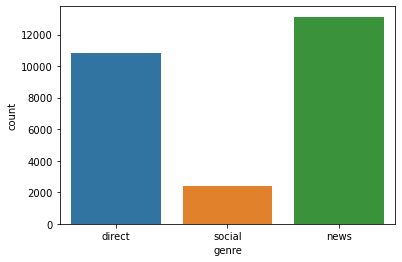

In [21]:
sns.countplot(df['genre'])

In [22]:
df.drop(['child_alone'],axis=1,inplace=True)

### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [23]:
# check number of duplicates
df.duplicated().sum()

171

In [24]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [25]:
# check number of duplicates
df.duplicated().sum()

0

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [26]:
def save_data(df, database_filename):
    """
    Save the clean dataset into a squlite databaset

    Args:
    df: clean data return from clean_data() function
    database_filename (str): filename.db of SQL database in which the clean dataset will be stored

    Returns:
    None
    """
    engine = create_engine('sqlite:///'+database_filename)
    table_name = database_filename.split('.')[0]
    df.to_sql(table_name, engine, index=False,if_exists='replace')

In [27]:
save_data(df,'DisasterResponse.db')

The database DisasterResponse.db is succesffuly created in the director where this notebook locates

In [37]:
# The following syntax is to ensure the code runs successfully on local computer

import os
database_filename = "DisasterResponse.db"
engine = create_engine('sqlite:///DisasterResponse.db')
table_name = os.path.basename(database_filename).split('.')[0]
df.to_sql(table_name, engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.